## STA 141A: Assignment 4
### Jiawei Zhu 923312684


## Question 1 

Generate 3 clusters in a two-dimensional space by sampling from bivariate normal distributions, for $k=1,2,3$,  
$$(x, y) \sim N(\mu_k, I_2),$$
where $\{\mu_k\}$ are two-dimensional vectors of your choice.

1. Generate 50 points in each cluster.
2. Draw a scatterplot of the unlabeled points.
3. Apply K-means with $K = 3$.
4. Add the resulting cluster assignments and cluster centers to your scatterplot


In [1]:
set.seed(141)

install.packages("tidyverse")
install.packages("cluster")
install.packages("patchwork")
library(tidyverse)
library(cluster)
library(patchwork)

# 1 （1）
n_per_cluster <- 50

toy_df <- tibble(
  x = c(rnorm(n_per_cluster, mean = 0,  sd = 1),
        rnorm(n_per_cluster, mean = 3,  sd = 1),
        rnorm(n_per_cluster, mean = -3, sd = 1)),
  y = c(rnorm(n_per_cluster, mean = 0,  sd = 1),
        rnorm(n_per_cluster, mean = 3,  sd = 1),
        rnorm(n_per_cluster, mean = 3,  sd = 1))
)

head(toy_df)

Installing package into ‘/Users/apple/Library/R/x86_64/4.4/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/n6/2hjz3yvj2vg2r_pxlz4tjkfm0000gn/T//Rtmp9uIDts/downloaded_packages


Installing package into ‘/Users/apple/Library/R/x86_64/4.4/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/n6/2hjz3yvj2vg2r_pxlz4tjkfm0000gn/T//Rtmp9uIDts/downloaded_packages


Installing package into ‘/Users/apple/Library/R/x86_64/4.4/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/n6/2hjz3yvj2vg2r_pxlz4tjkfm0000gn/T//Rtmp9uIDts/downloaded_packages


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.5     ✔ tidyr     1.3.2
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


x,y
<dbl>,<dbl>
0.51435972,0.16478391
-0.11277738,0.94215711
0.06434006,1.65392909
-0.65524480,0.10980422
0.50172420,0.38783778
-0.83524947,0.08093793


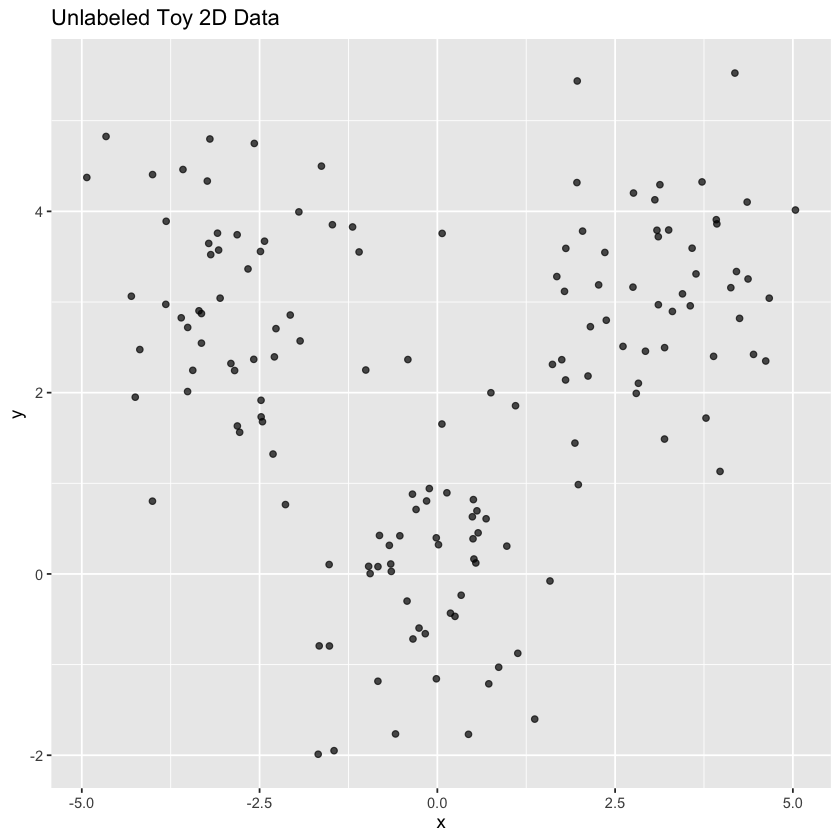

In [2]:
# 1 （2）
ggplot(toy_df, aes(x = x, y = y)) +
  geom_point(alpha = 0.7) +
  labs(title = "Unlabeled Toy 2D Data", x = "x", y = "y")


In [3]:
# 1 （3)
k3_fit <- kmeans(toy_df, centers = 3, nstart = 20)
k3_fit


K-means clustering with 3 clusters of sizes 49, 51, 50

Cluster means:
            x          y
1 -2.88007703 3.06433907
2 -0.07313901 0.01447973
3  3.12891189 3.13124742

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 1 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 1 1 1 2 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

Within cluster sum of squares by cluster:
[1] 95.43659 89.47962 86.27205
 (between_SS / total_SS =  81.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

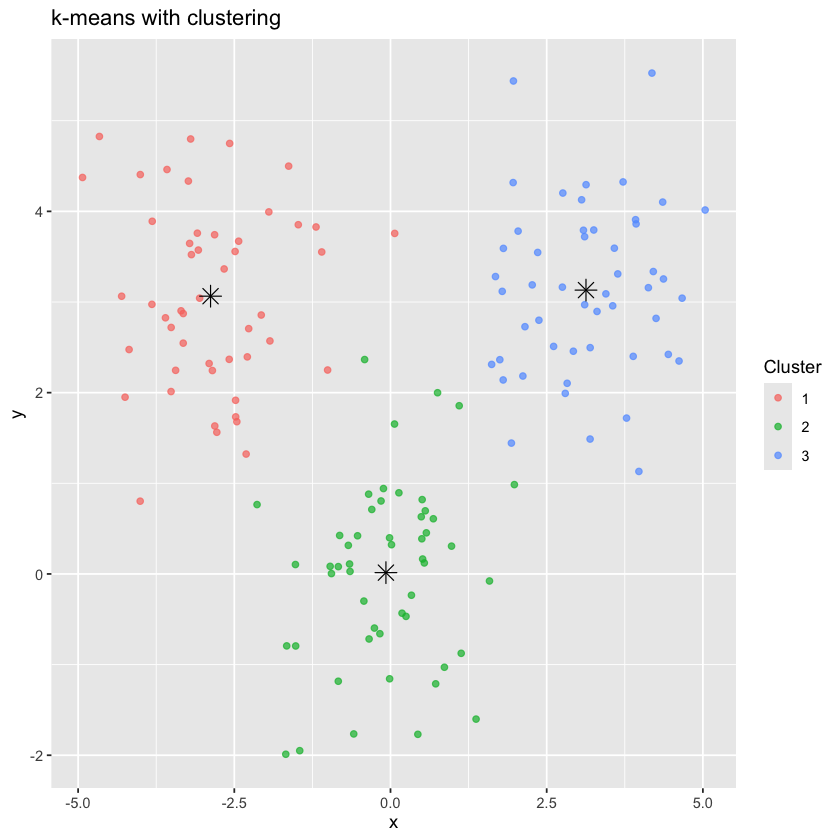

In [5]:
# 1（4）

toy_df$predicted_cluster <- factor(k3_fit$cluster)

centers_df <- as.data.frame(k3_fit$centers)

ggplot(toy_df, aes(x = x, y = y, color = predicted_cluster)) +
  geom_point(alpha = 0.7) +
  geom_point(data = centers_df,
             aes(x = x, y = y),
             size = 4, shape = 8,
             inherit.aes = FALSE) +
  labs(title = "k-means with clustering", color = "Cluster")

## Question 2 

Consider the `USArrests` dataset in `R`.

1. Convert `USArrests` into a tibble with a `State` column.
2. Run K-means with $K = 4$ on the raw variables.
3. Run K-means with $K = 4$ on scaled variables (use `scale()`).
4. Compare the two cluster assignments using tables or plots.
5. Explain whether scaling is necessary or not in this case.


In [34]:
# 2 （1）
 arrests <- USArrests |>
  as_tibble(rownames = "State")
 head(arrests)

State,Murder,Assault,UrbanPop,Rape
<chr>,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [36]:
# 2（2）
set.seed(141)
k4_fit <- kmeans(arrests |> select(-State), centers = 4)
k4_fit

K-means clustering with 4 clusters of sizes 10, 14, 16, 10

Cluster means:
     Murder  Assault UrbanPop     Rape
1  5.590000 112.4000 65.60000 17.27000
2  8.214286 173.2857 70.64286 22.84286
3 11.812500 272.5625 68.31250 28.37500
4  2.950000  62.7000 53.90000 11.51000

Clustering vector:
 [1] 3 3 3 2 3 2 1 3 3 2 4 1 3 1 4 1 1 3 4 3 2 3 4 3 2 1 1 3 4 2 3 3 3 4 1 2 2 1
[39] 2 3 4 2 2 1 4 2 2 4 4 2

Within cluster sum of squares by cluster:
[1]  1480.210  9136.643 19563.863  4547.914
 (between_SS / total_SS =  90.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [37]:
# 2（3）
 arrests_numeric <- arrests |>
   select(-State)
 arrests_scaled <- arrests_numeric |>
   scale() |>
   as_tibble()
 summary(arrests_scaled)

set.seed(141)

k4_scaled <- kmeans(arrests_scaled, centers = 4, nstart = 20)

k4_scaled

     Murder           Assault           UrbanPop             Rape        
 Min.   :-1.6044   Min.   :-1.5090   Min.   :-2.31714   Min.   :-1.4874  
 1st Qu.:-0.8525   1st Qu.:-0.7411   1st Qu.:-0.76271   1st Qu.:-0.6574  
 Median :-0.1235   Median :-0.1411   Median : 0.03178   Median :-0.1209  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.7949   3rd Qu.: 0.9388   3rd Qu.: 0.84354   3rd Qu.: 0.5277  
 Max.   : 2.2069   Max.   : 1.9948   Max.   : 1.75892   Max.   : 2.6444  

K-means clustering with 4 clusters of sizes 16, 8, 13, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1 -0.4894375 -0.3826001  0.5758298 -0.26165379
2  1.4118898  0.8743346 -0.8145211  0.01927104
3  0.6950701  1.0394414  0.7226370  1.27693964
4 -0.9615407 -1.1066010 -0.9301069 -0.96676331

Clustering vector:
 [1] 2 3 3 2 3 3 1 1 3 2 1 4 3 1 4 1 4 2 4 3 1 3 4 2 3 4 4 3 4 1 3 3 2 4 1 1 1 1
[39] 1 2 4 2 3 1 4 1 1 4 4 1

Within cluster sum of squares by cluster:
[1] 16.212213  8.316061 19.922437 11.952463
 (between_SS / total_SS =  71.2 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [41]:
# 2（4)

arrests_compare <- arrests %>%
  mutate(
    cluster_raw    = factor(k4_fit$cluster),
    cluster_scaled = factor(k4_scaled$cluster)
  )

two_table <- table(arrests_compare$cluster_raw, arrests_compare$cluster_scaled)
prop.table(two_table, margin = 1)


   
            1         2         3         4
  1 0.6000000 0.0000000 0.0000000 0.4000000
  2 0.5714286 0.2142857 0.2142857 0.0000000
  3 0.0625000 0.3125000 0.6250000 0.0000000
  4 0.1000000 0.0000000 0.0000000 0.9000000

### Question 2 (5)
### The scaling is necessary. Because in the table you can see that the variable Assault is much more lager than the Murders, so that it will ignores other variables. And after scaling, the results has totally changed. It has a great influence.

## Question 3

Consider the `USAarrests` data again, with scaled variables.


1. Run K-means with `nstart = 20` for $K = 1, 2, \dots, 10$.
2. Extract the total within-cluster sum of squares (`tot.withinss`).
3. Make an elbow plot of `tot.withinss` versus K.
4. Report a reasonable value of $K$ and justify your choice.


In [45]:
#3 (1) (2)
set.seed(141)   

 k_values <- 1:10
 k_results <- tibble(
   K = k_values,
   tot_withinss = purrr::map_dbl(k_values, ~{
     k_fit <- kmeans(arrests_scaled, centers = .x, nstart = 20)
     k_fit$tot.withinss
   })
 )
 k_results

K,tot_withinss
<int>,<dbl>
1,196.00000
2,102.86240
3,78.32327
4,56.40317
5,48.94420
6,42.83303
7,38.68404
8,34.10865
9,29.86789


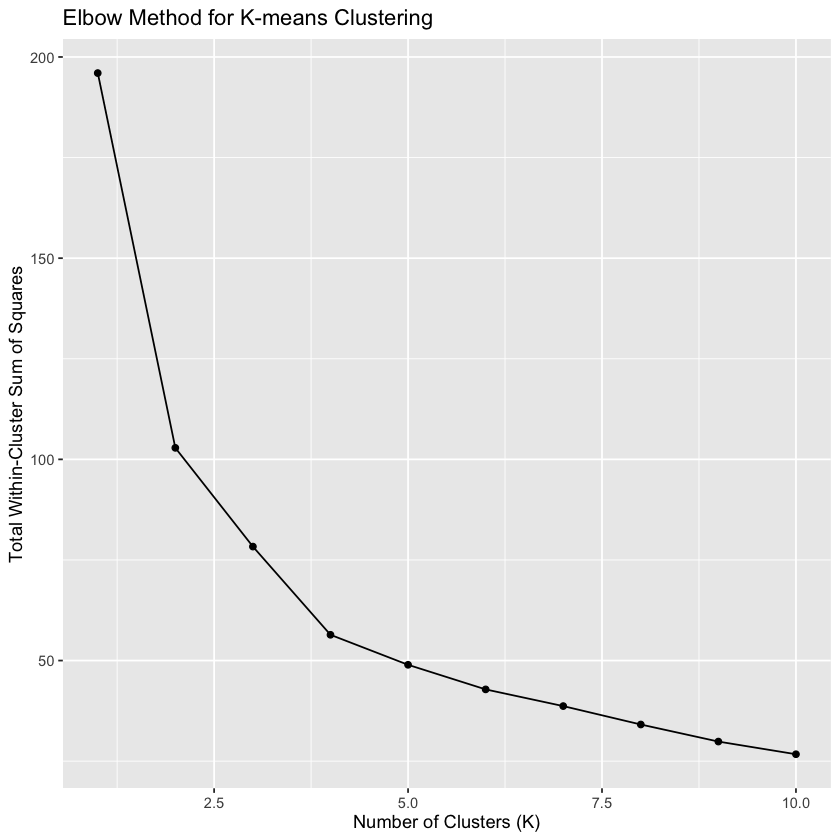

In [46]:
#3（3）
    ggplot(k_results, aes(x = K, y = tot_withinss)) +
    geom_line() +
    geom_point() +
    labs(title = "Elbow Method for K-means Clustering",
            x = "Number of Clusters (K)",
            y = "Total Within-Cluster Sum of Squares")

### 3(4)
#### I would like to choose When K = 4. In the elbow, you can check it is extremly decrease from K = 1 to K =4. But When K = 4 till the end, it still decease but become much more smaller. So that K = 4 is the best point to balalncing the clustering quality and model complexity.

## Question 4

Using the scaled `USArrests` dataset again.

1. Compute a distance matrix using Euclidean distance.
2. Perform hierarchical clustering with complete linkage.
3. Plot the dendrogram of the clustering result.
4. Cut the dendrogram into 4 clusters and compare these to the K-means clusters on scaled data.



          kmeans_cluster
hc_cluster  1  2  3  4
         1  0  7  1  0
         2  0  0 11  0
         3 16  1  1  3
         4  0  0  0 10

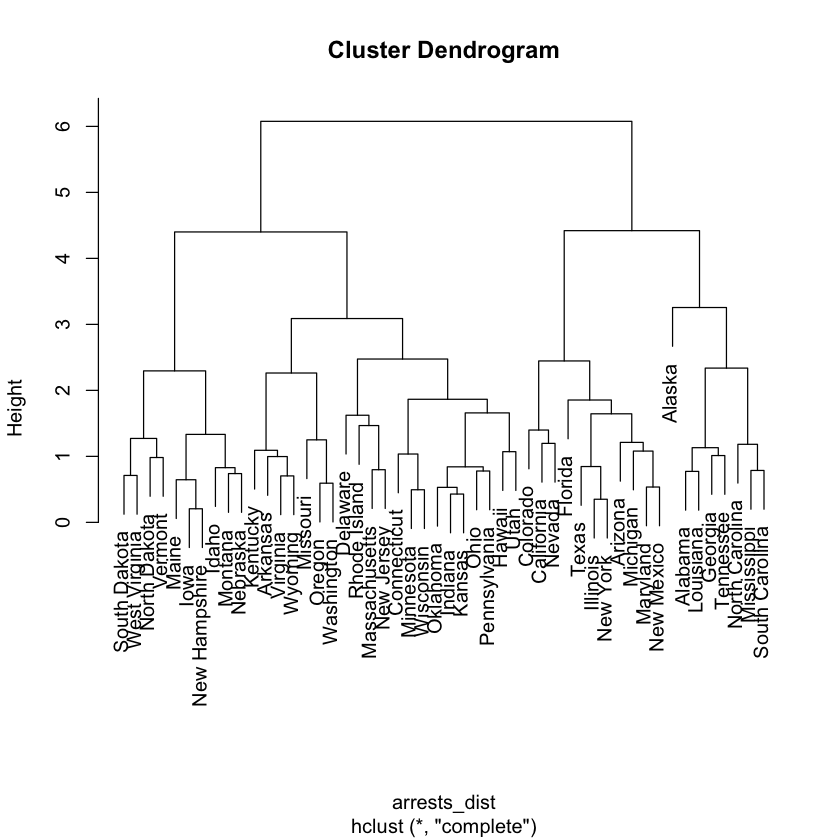

In [49]:
# 4 (1)(2)(3)(4)
 arrests_dist <- dist(arrests_scaled, method = "euclidean")
 arrests_hc   <- hclust(arrests_dist, method = "complete")
 plot(arrests_hc, labels = arrests$State)
 hc_clusters <- cutree(arrests_hc, k = 4)
 table(hc_cluster = hc_clusters, kmeans_cluster = k4_scaled$cluster)

### Question 4（4）
##### After Cut the dendrogram into 4 clusters, we can see that there are two ways of clusters matches weel, some or not. It means that there are different clustering criteria between hierarchical and K-means.

## Question 5

Using the scaled `USArrests` data again.

1. For each $K = 2, \dots, 8$, run k-means with `nstart = 20`.
2. For each K, compute the average silhouette score using the `silhouette()` function
   from the `cluster` package.
3. Plot the average silhouette score versus K.
4. Which K maximizes the average silhouette width? Compare this choice to your elbow-plot choice and explain any differences.


In [ ]:
# 5 (1)(2)
set.seed(141)

sil_widths <- tibble(
  K = 2:8,
  sil_width = purrr::map_dbl(2:8, ~{
    k_fit <- kmeans(arrests_scaled, centers = .x, nstart = 20)
    sil <- silhouette(k_fit$cluster, dist(arrests_scaled))
    mean(sil[, 3])
  })
)
sil_widths


K,sil_width
<int>,<dbl>
2,0.4084890
3,0.3094312
4,0.3396889
5,0.3030781
6,0.2859821
7,0.2889692
8,0.2624851


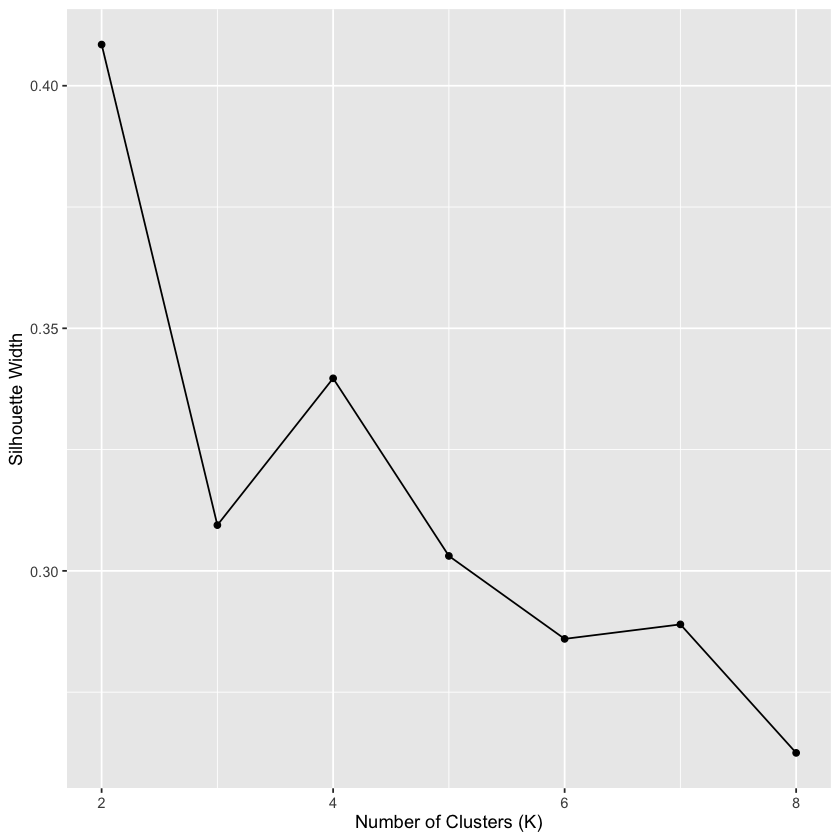

In [52]:
# 5 (3)
ggplot(sil_widths, aes(x = K, y = sil_width)) +
  geom_line() +
  geom_point() +
  labs(x = "Number of Clusters (K)", y = "Silhouette Width")

### Question 5 (4)
#### K = 2 maximizes the average silhouette width (0.4084). The elbow perhaps need more clusters for continous decreasing,but silhouette more perfer K = 2 because it can sperates clusters more clearly. This difference suggests that while finer sub-clusters may exist, the data are most naturally divided into two m   ain groups. 